In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Generator import generate_synthetic_image
from Models import KeypointDataset, extract_keypoints_from_target

import matplotlib.pyplot as plt
import numpy as np

import random

# Test all shape types
shape_types = ["triangle", "quadrilateral", "star", "checkerboard", "cube", "multiple"]

TEST 1: RGB Image Generation
----------------------------------------------------------------------
✓ triangle: shape=(256, 256, 3), dtype=uint8, keypoints=3
✓ quadrilateral: shape=(256, 256, 3), dtype=uint8, keypoints=4
✓ star: shape=(256, 256, 3), dtype=uint8, keypoints=7
✓ checkerboard: shape=(256, 256, 3), dtype=uint8, keypoints=30
✓ cube: shape=(256, 256, 3), dtype=uint8, keypoints=7
✓ multiple: shape=(256, 256, 3), dtype=uint8, keypoints=11


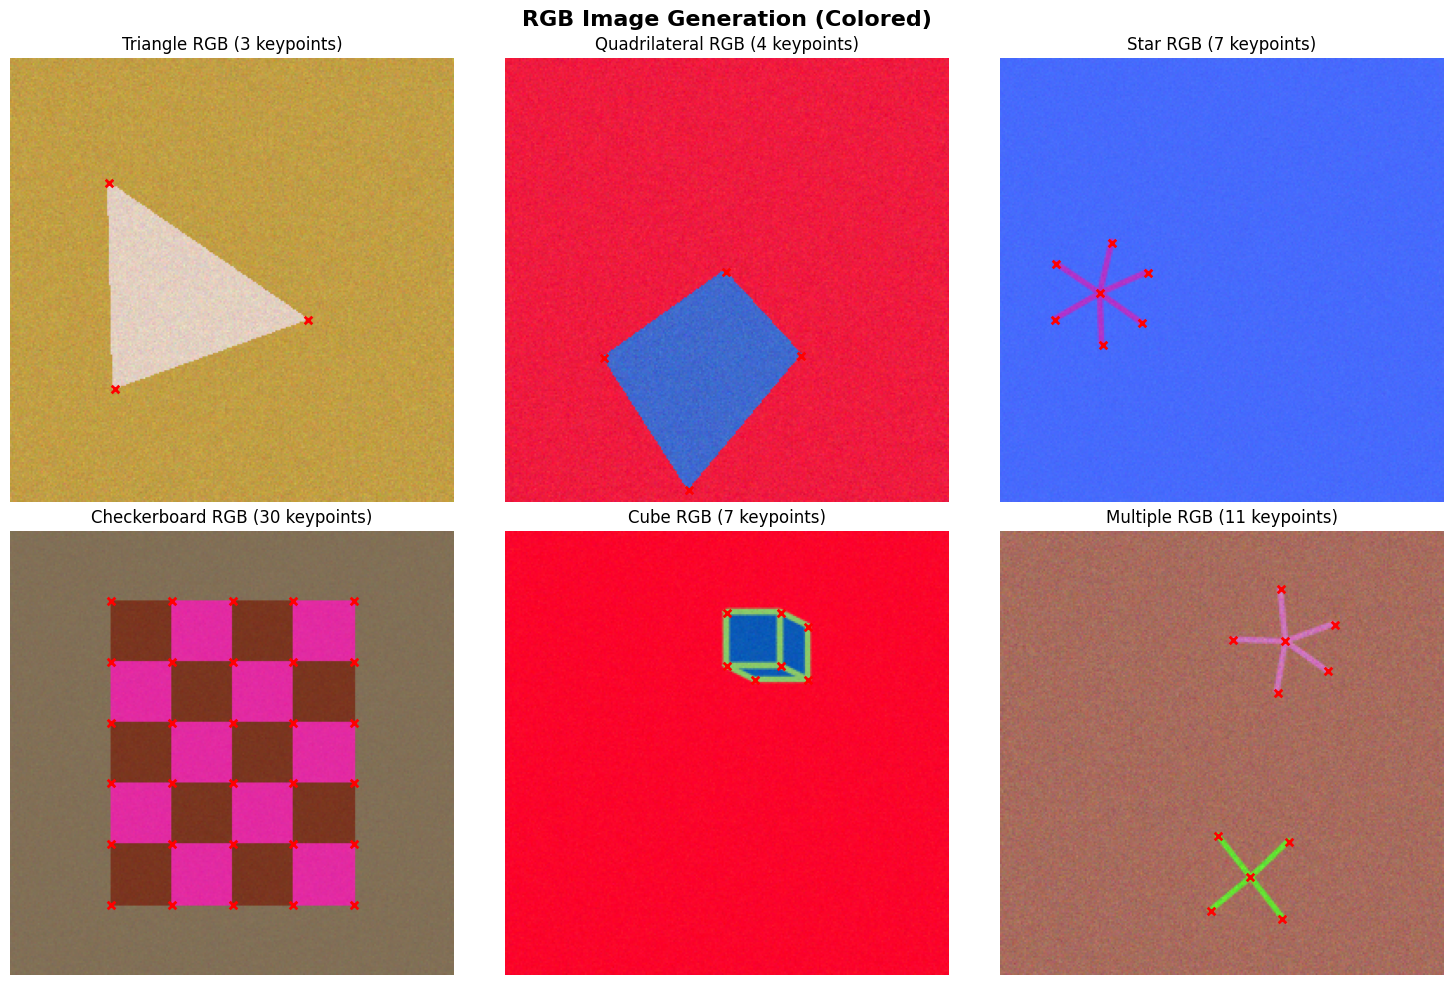

In [2]:
# ============================================================
# TEST 1: RGB Generation (for visualization/testing)
# ============================================================
print("TEST 1: RGB Image Generation")
print("-" * 70)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, shape_type in enumerate(shape_types):
    img, keypoints = generate_synthetic_image(
        256, 256,
        shape_type=shape_type,
        use_homography=False,
        grayscale=False  # RGB mode
    )

    axes[i].imshow(img)  # RGB image - no cmap needed
    axes[i].scatter(keypoints[:, 0], keypoints[:, 1], c='red', s=30, marker='x', linewidths=2)
    axes[i].set_title(f"{shape_type.capitalize()} RGB ({len(keypoints)} keypoints)")
    axes[i].axis('off')

    print(f"✓ {shape_type}: shape={img.shape}, dtype={img.dtype}, keypoints={len(keypoints)}")

plt.suptitle("RGB Image Generation (Colored)", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print()

TEST 2: Grayscale Image Generation
----------------------------------------------------------------------
✓ triangle: shape=(256, 256), dtype=uint8, keypoints=3
✓ quadrilateral: shape=(256, 256), dtype=uint8, keypoints=4
✓ star: shape=(256, 256), dtype=uint8, keypoints=5
✓ checkerboard: shape=(256, 256), dtype=uint8, keypoints=30
✓ cube: shape=(256, 256), dtype=uint8, keypoints=7
✓ multiple: shape=(256, 256), dtype=uint8, keypoints=9


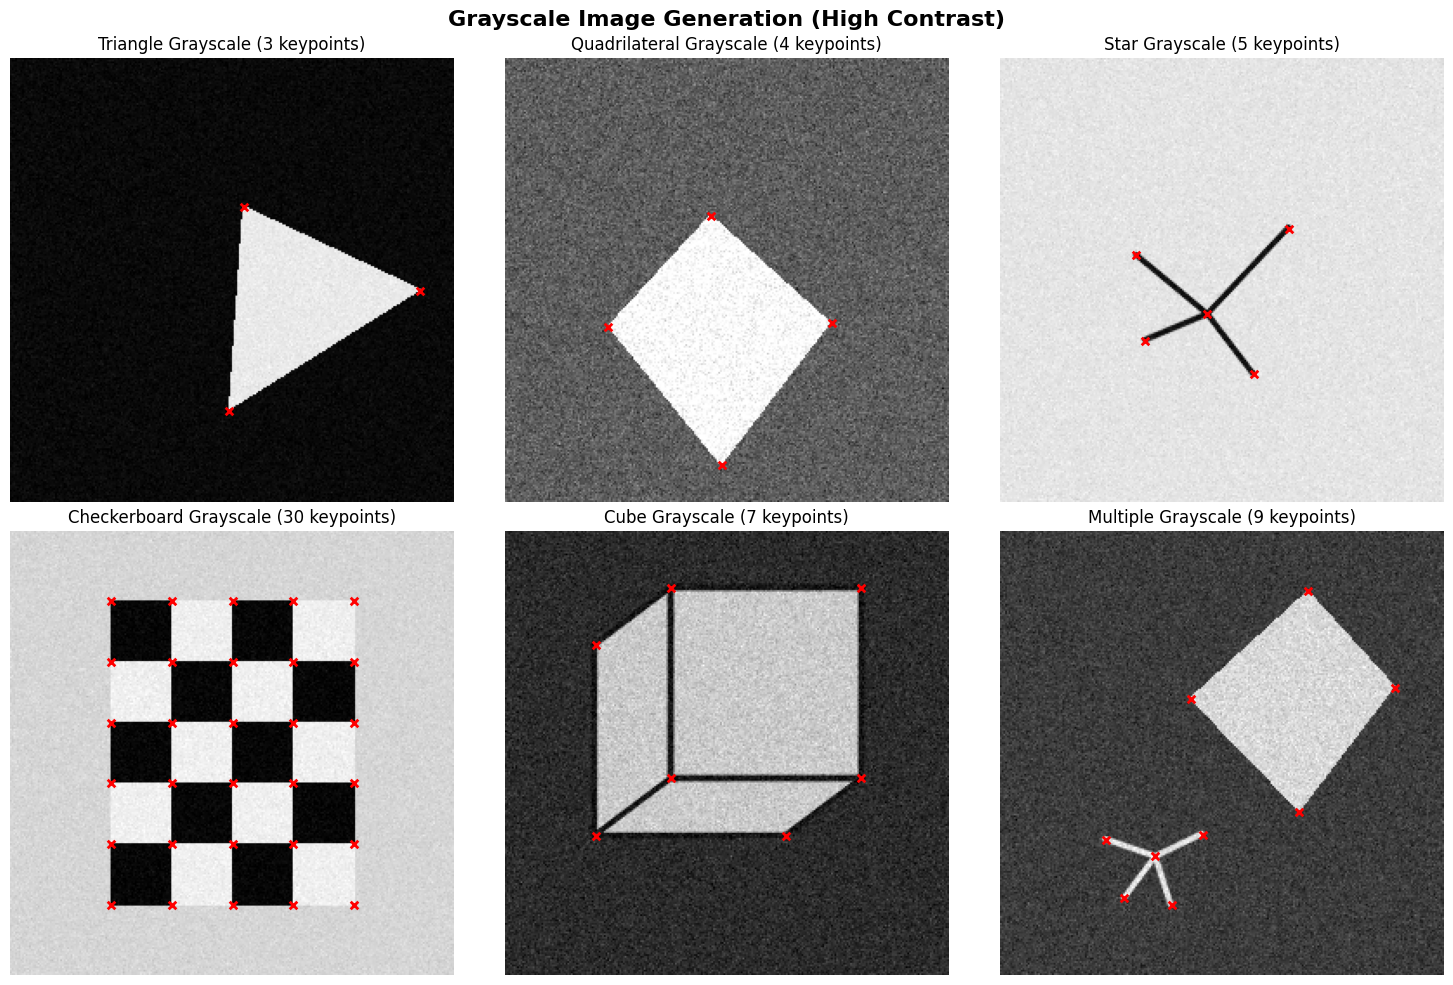

In [16]:
# ============================================================
# TEST 2: Grayscale Generation (for training dataset)
# ============================================================
print("TEST 2: Grayscale Image Generation")
print("-" * 70)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, shape_type in enumerate(shape_types):
    img, keypoints = generate_synthetic_image(
        256, 256,
        shape_type=shape_type,
        use_homography=False,
        grayscale=True  # Grayscale mode
    )

    axes[i].imshow(img, cmap='gray')  # Grayscale - use gray colormap
    axes[i].scatter(keypoints[:, 0], keypoints[:, 1], c='red', s=30, marker='x', linewidths=2)
    axes[i].set_title(f"{shape_type.capitalize()} Grayscale ({len(keypoints)} keypoints)")
    axes[i].axis('off')

    print(f"✓ {shape_type}: shape={img.shape}, dtype={img.dtype}, keypoints={len(keypoints)}")

plt.suptitle("Grayscale Image Generation (High Contrast)", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print()

TEST 4: Grayscale with Homography Augmentation
----------------------------------------------------------------------
✓ triangle: keypoints after homography=2
✓ quadrilateral: keypoints after homography=1
✓ star: keypoints after homography=2
✓ checkerboard: keypoints after homography=10
✓ cube: keypoints after homography=4
✓ multiple: keypoints after homography=12


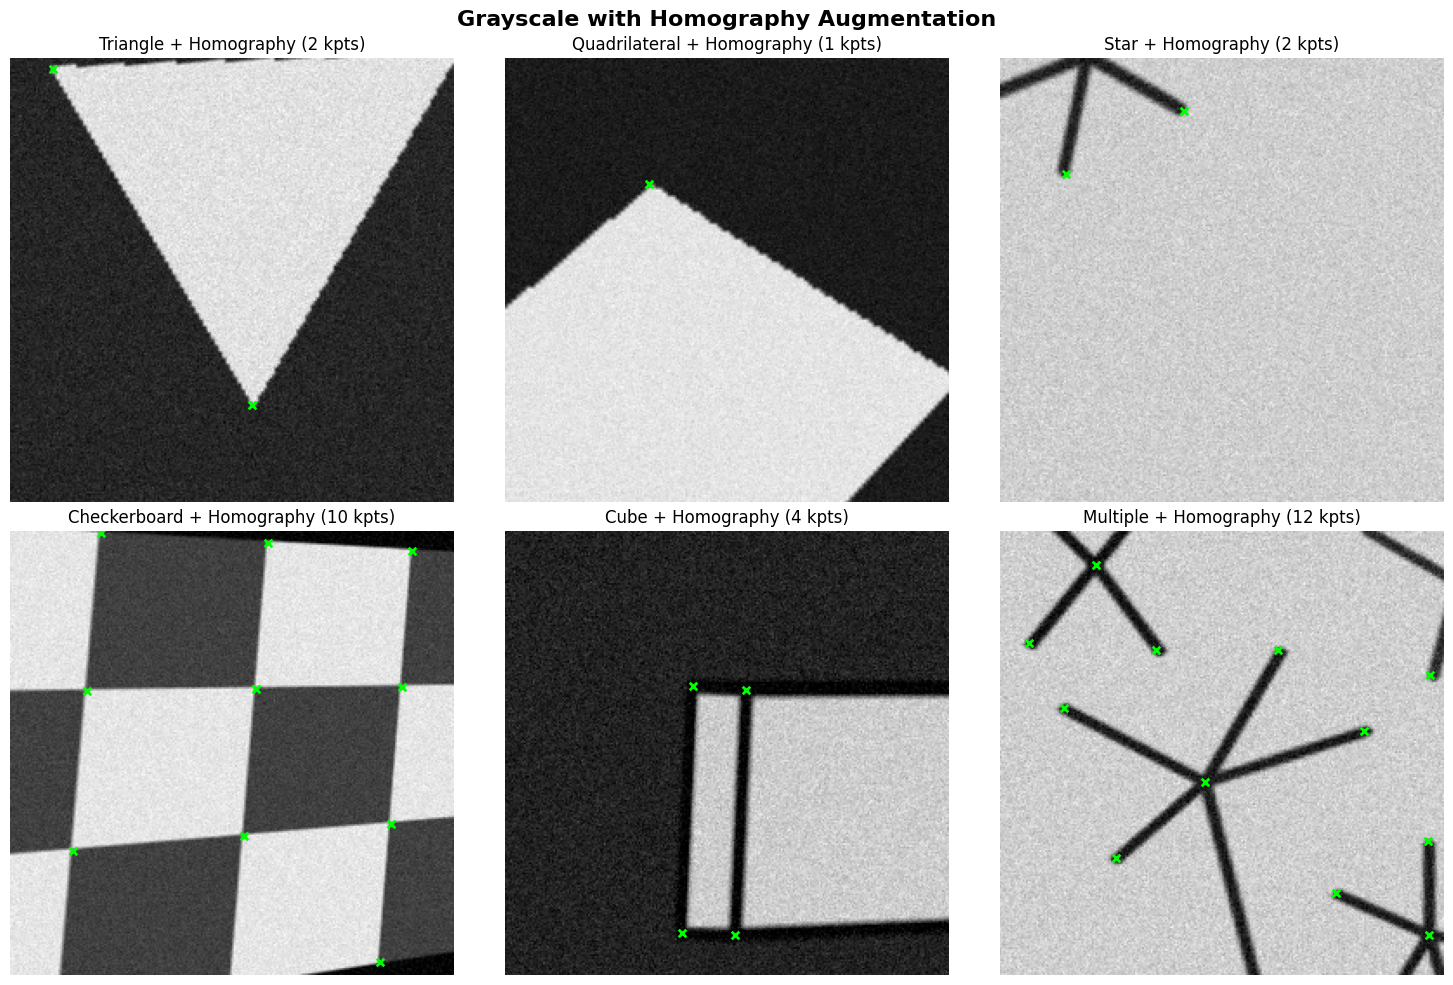

In [5]:
# ============================================================
# TEST 4: With Homography
# ============================================================
print("TEST 4: Grayscale with Homography Augmentation")
print("-" * 70)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, shape_type in enumerate(shape_types):
    img, keypoints = generate_synthetic_image(
        256, 256,
        shape_type=shape_type,
        use_homography=True,  # Apply homography
        grayscale=True
    )

    axes[i].imshow(img, cmap='gray')
    axes[i].scatter(keypoints[:, 0], keypoints[:, 1], c='lime', s=30, marker='x', linewidths=2)
    axes[i].set_title(f"{shape_type.capitalize()} + Homography ({len(keypoints)} kpts)")
    axes[i].axis('off')

    print(f"✓ {shape_type}: keypoints after homography={len(keypoints)}")

plt.suptitle("Grayscale with Homography Augmentation", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [18]:
# Generate and save dataset
print("Generating dataset with raw samples...")
dataset_generator = KeypointDataset(
    num_samples=100,
    image_shape=(256, 256),
    generate_fn=generate_synthetic_image,
    generate_kwargs={'width': 256, 'height': 256, 'shape_type': 'random', 'grayscale': True},
    use_homography_augment=False,
    use_photometric_augment=False,
    use_geometric_augment=False,
    pregenerate=True
)

# Save to file
dataset_generator.save_to_file('pregenerated_samples.npz')
print("Dataset saved!")

Generating dataset with raw samples...
Pre-generating 100 base samples...
  100/100 samples
✓ Pre-generation complete!
✓ Saved 100 samples to pregenerated_samples.npz
Dataset saved!


In [22]:
# Load dataset from file with different augmentation settings
print("Loading dataset without augmentation (raw samples)...")
dataset_raw = KeypointDataset(
    num_samples=100,
    image_shape=(256, 256),
    use_homography_augment=False,
    use_photometric_augment=False,
    use_geometric_augment=False,
    pregenerate=False,
    load_from_file='pregenerated_samples.npz'
)

print("\nLoading dataset with augmentation (from same file)...")
dataset_augmented = KeypointDataset(
    num_samples=100,
    image_shape=(256, 256),
    use_homography_augment=True,
    use_photometric_augment=True,
    use_geometric_augment=True,
    pregenerate=False,
    load_from_file='pregenerated_samples.npz'
)

print("\nLoading dataset with fresh random generation + augmentation...")
dataset_fresh = KeypointDataset(
    num_samples=100,
    image_shape=(256, 256),
    use_homography_augment=True,
    use_photometric_augment=True,
    use_geometric_augment=True,
    pregenerate=False,
    generate_fn=generate_synthetic_image,
    generate_kwargs={
        'width': 256,
        'height': 256,
        'shape_type': 'random',
        'grayscale': True,
    }
)

print("\nAll datasets loaded!")

Loading dataset without augmentation (raw samples)...
Loading 100 samples from pregenerated_samples.npz...
✓ Loaded 100 samples!

Loading dataset with augmentation (from same file)...
Loading 100 samples from pregenerated_samples.npz...
✓ Loaded 100 samples!

Loading dataset with fresh random generation + augmentation...

All datasets loaded!


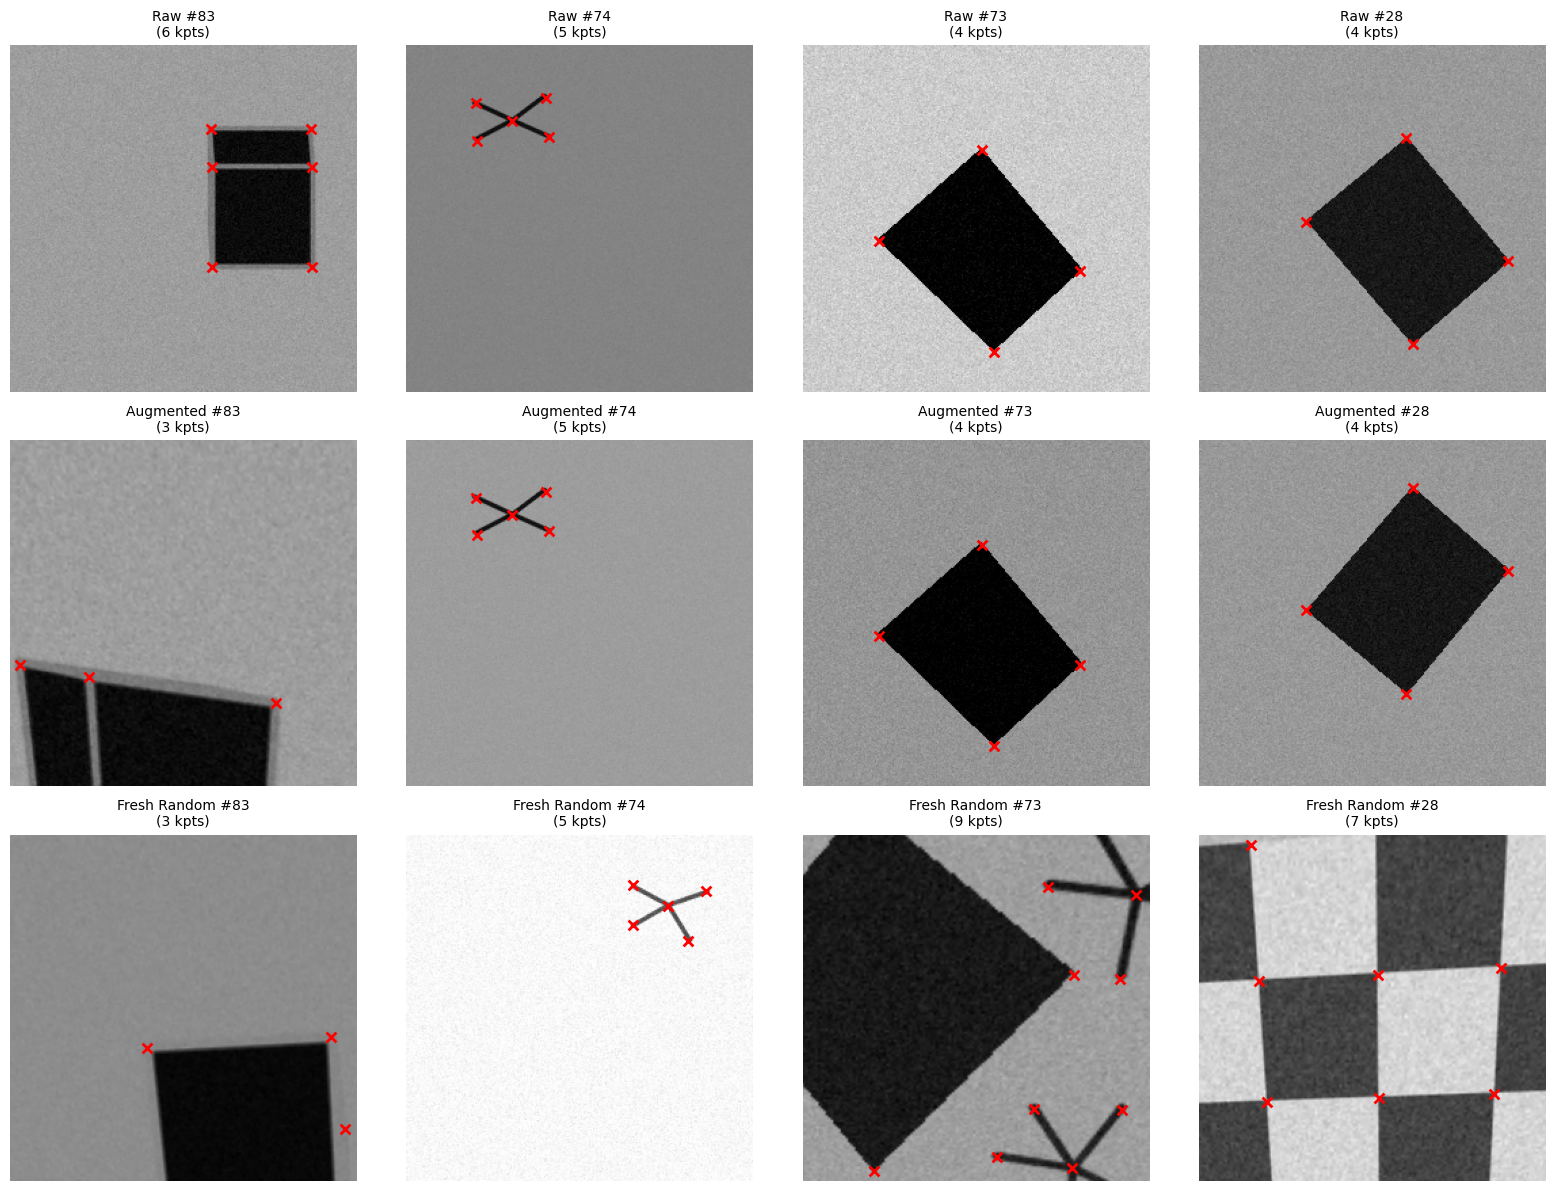

In [26]:
# Select 4 random sample indices
num_samples_to_show = 4
random_indices = random.sample(range(len(dataset_raw.pregenerated_data)), num_samples_to_show)

# Create 3-row plot: raw, augmented from file, fresh random
fig, axes = plt.subplots(3, num_samples_to_show, figsize=(16, 12))

for col, idx in enumerate(random_indices):
    # Row 1: Raw sample (no augmentation)
    img_raw, target_raw = dataset_raw[idx]
    img_raw_np = img_raw.squeeze().numpy()
    raw_kpts = extract_keypoints_from_target(target_raw)

    axes[0, col].imshow(img_raw_np, cmap='gray', vmin=0, vmax=1)
    if len(raw_kpts) > 0:
        axes[0, col].scatter(raw_kpts[:, 0], raw_kpts[:, 1], c='red', s=50, marker='x', linewidths=2)
    axes[0, col].set_title(f'Raw #{idx}\n({len(raw_kpts)} kpts)', fontsize=10)
    axes[0, col].axis('off')

    # Row 2: Augmented sample (same base image from file)
    img_aug, target_aug = dataset_augmented[idx]
    img_aug_np = img_aug.squeeze().numpy()
    aug_kpts = extract_keypoints_from_target(target_aug)

    axes[1, col].imshow(img_aug_np, cmap='gray', vmin=0, vmax=1)
    if len(aug_kpts) > 0:
        axes[1, col].scatter(aug_kpts[:, 0], aug_kpts[:, 1], c='red', s=50, marker='x', linewidths=2)
    axes[1, col].set_title(f'Augmented #{idx}\n({len(aug_kpts)} kpts)', fontsize=10)
    axes[1, col].axis('off')

    # Row 3: Fresh random generation (completely new image)
    img_fresh, target_fresh = dataset_fresh[idx]
    img_fresh_np = img_fresh.squeeze().numpy()
    fresh_kpts = extract_keypoints_from_target(target_fresh)

    axes[2, col].imshow(img_fresh_np, cmap='gray', vmin=0, vmax=1)
    if len(fresh_kpts) > 0:
        axes[2, col].scatter(fresh_kpts[:, 0], fresh_kpts[:, 1], c='red', s=50, marker='x', linewidths=2)
    axes[2, col].set_title(f'Fresh Random #{idx}\n({len(fresh_kpts)} kpts)', fontsize=10)
    axes[2, col].axis('off')

# Row labels
axes[0, 0].set_ylabel('Raw\n(No Augmentation)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Augmented\n(From File)', fontsize=12, fontweight='bold')
axes[2, 0].set_ylabel('Fresh Random\n(Generated)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()